Proportion of customers per city by gender:
         is_female   is_male
city                        
Mombasa   0.640000  0.360000
Nairobi   0.582278  0.417722
Nakuru    0.663399  0.336601


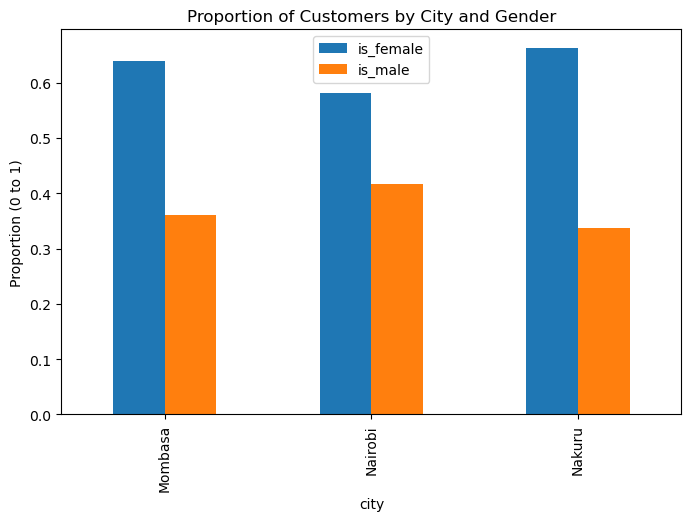

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/supermarket_data.csv")

# Binary columns for gender is_female nd is_male are flag downs 
df["is_female"] = (df["gender"] == "Female").astype(int)
df["is_male"] = (df["gender"] == "Male").astype(int)

# Pivot: proportion of customers by city and gender
pivot = pd.pivot_table(
    df,
    values=["is_female", "is_male"],
    index="city",
    aggfunc="mean",
    fill_value=0
)

print("Proportion of customers per city by gender:")
print(pivot)

# Optional: plot
pivot.plot(kind="bar", figsize=(8,5))
plt.title("Proportion of Customers by City and Gender")
plt.ylabel("Proportion (0 to 1)")
plt.show()




In [9]:


# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Create month column (e.g., Jan, Feb, Mar)
df["month"] = df["date"].dt.strftime("%b")

# Define month order (so plots are in correct order)
month_order = ["Jan","Feb","Mar","Apr","May","Jun",
               "Jul","Aug","Sep","Oct","Nov","Dec"]




In [15]:
# Group sales by month and payment method
payment_sales = df.groupby(["month","payment"])["total"].sum().unstack().reindex(month_order).dropna()
print(payment_sales)

# Plot line graph
payment_sales.plot(kind="line", marker="o", figsize=(8,5))
plt.title("💳 Sales by Payment Method Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(alpha=0.3)
plt.show()


payment        Cash  Credit card       MPESA
month                                       
Jan      32322.8955   31595.7075  48121.7415
Feb      32035.9305   28743.3930  47502.4200
Mar      26114.2035   23177.3010  53449.0740


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


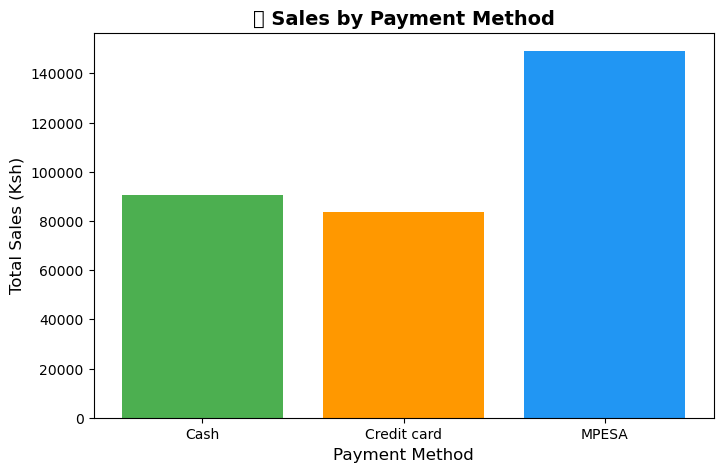

In [28]:
payment_sales = df.groupby("payment")["total"].sum()

plt.figure(figsize=(8,5))
plt.bar(payment_sales.index, payment_sales.values, color=["#4CAF50", "#FF9800", "#2196F3"])

plt.title("💳 Sales by Payment Method", fontsize=14, fontweight="bold")
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Sales (Ksh)", fontsize=12)
plt.show()


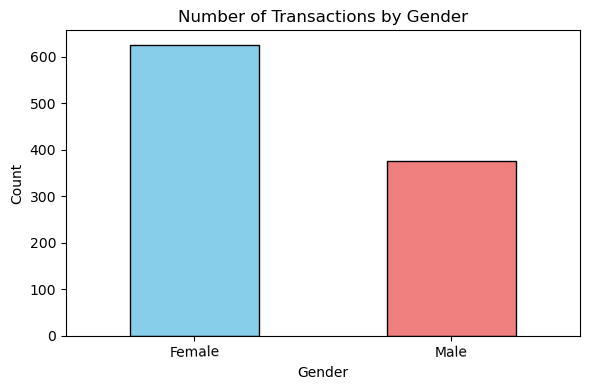

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df["gender"].value_counts().plot(kind="bar", color=["skyblue","lightcoral"], edgecolor="black")
plt.title("Number of Transactions by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()
